Copy from https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/stats.html#multivariate-estimation

In [10]:
import numpy as np

def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

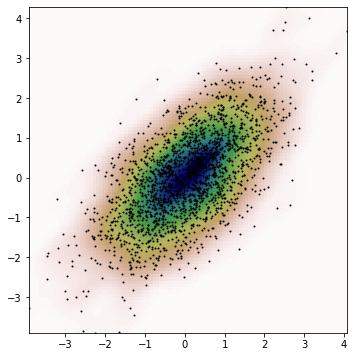

In [15]:
import matplotlib.pyplot as plt
from scipy import stats

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.savefig("fig/test.png", dpi=300)
plt.show()